# Manual create synthetic text

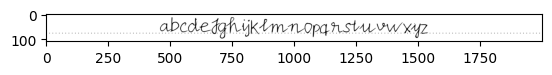

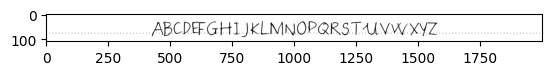

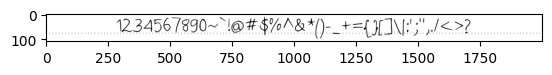

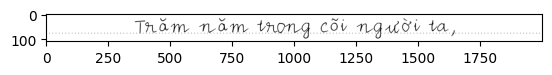

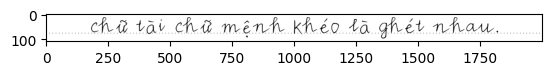

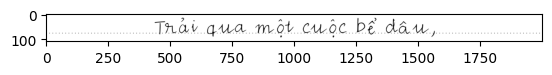

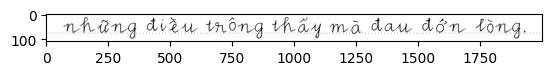

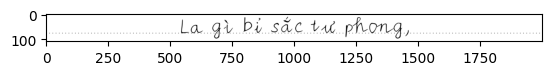

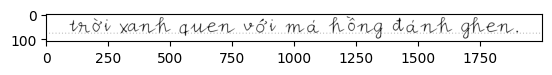

In [3]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def add_dots_below_text(text, font_path,
                        font_size, dot_size=2,
                        dot_spacing=13, height_of_rows_dots=25):
    """Function to create an image with specific text, font style, font size"""
    # Load the font
    font = ImageFont.truetype(font_path, font_size)

    # Create a blank image with white background
    text_width, text_height = 2000, 100 # 1500, 100
    image = Image.new('RGB', (text_width, text_height + 8), color='white')

    # Draw text on the image using your font and desired color
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), text, font=font)
    # draw.text((0, 0), text, fill='black', font=font, align="right")
    draw.text(((text_width-w)/2, (text_height-h)/2), text, fill='black', font=font)


    # Move dots closer to the text (adjust dot_position)
    dot_position = text_height  -  height_of_rows_dots # Position the dots just below the text
    # print(text_height)
    for x in range(0, text_width, dot_spacing):
        draw.ellipse((x, dot_position, x + dot_size, dot_position + dot_size), fill='black')

    return image

text_dict = ['abcdefghijklmnopqrstuvwxyz',
             'ABCDEFGHIJKLMNOPQRSTUVWXYZ',
            #  '!"#$%&()*+,-./:;<=>?@[\?]^_{}~0123456789',
             '1234567890~`!@#$%^&*()-_+={}[]\|:\';",./<>?',
             'Trăm năm trong cõi người ta,',
             'chữ tài chữ mệnh khéo là ghét nhau.',
             'Trải qua một cuộc bể dâu,',
             'những điều trông thấy mà đau đớn lòng.',
             'Lạ gì bỉ sắc tư phong,',
             'trời xanh quen với má hồng đánh ghen.']
font_path = 'output/data_16/MyFont.ttf'
# 2,5,6,7,9,15 quite good
# 16,17,19,20,21 good
# font_size_text = 60, font_size_number = 90
font_size = 100
for index, text in enumerate(text_dict):
    image = add_dots_below_text(text, font_path, font_size)
    image.save(f"result_image/image_{index}.png")
    # cv2.imwrite(f"result_image/image_{index}", image)
    plt.figure()
    plt.imshow(image)
    plt.show()